# Select Plots for Presentations

In [67]:
# add import file
import sys
sys.path.insert(1, '/Users/julianschmitt/Documents/NOAA/Snow_Droughts/src/')
# get all imports
from imports import *

# additional imports
import matplotlib.patheffects as PathEffects
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from shapely.ops import cascaded_union


In [17]:
# plot HUC2s using cartopy
# load shapefile data from geopandas
gpd_HUC2 = gpd.read_file("/Users/julianschmitt/Downloads/NOAA/shape/huc2_regions.shp")
gpd_HUC4 = gpd.read_file("/Users/julianschmitt/Downloads/NOAA/shape/huc4_regions.shp")
HUC2 = ShapelyFeature(Reader("/Users/julianschmitt/Downloads/NOAA/shape/huc2_regions.shp").geometries(),
                             crs=ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=1.5)

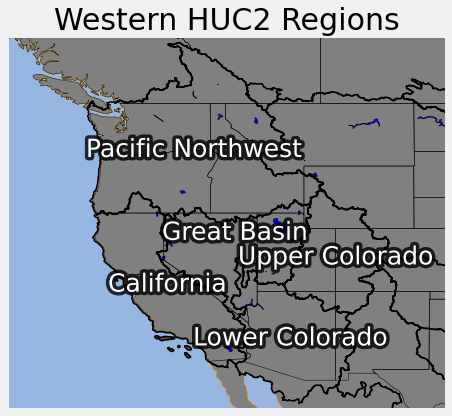

In [59]:
plt.style.use('fivethirtyeight')
bounds = [-130., -102., 29.5, 53.3]
plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.PlateCarree())

# load projection
ax = plt.axes(projection=ccrs.PlateCarree())

# add land, lakes, oceans, and HUC2 regions
ax.add_feature(cfeature.LAND, edgecolor="orange", facecolor="grey", zorder=0)
ax.add_feature(cfeature.LAKES, edgecolor='black', facecolor="blue")
ax.add_feature(cfeature.OCEAN)
ax.add_feature(HUC2)
# add states 
ax.add_feature(cfeature.STATES, linewidth=0.5)

# add labels
for ind, label in enumerate(labels):
    x, y = text_locs[ind][0], text_locs[ind][1]
    if x < -105:
        if label == 'Great Basin':
            y= y+1
        ax.text(x, y, label, color='white', size=25, ha='center', va='center', 
               transform=ccrs.PlateCarree(), path_effects=[PathEffects.withStroke(linewidth=7, foreground="k", alpha=.8)])

ax.set_extent(bounds, crs=ccrs.PlateCarree())
ax.set_title("Western HUC2 Regions", fontsize=30)
plt.savefig("/Users/julianschmitt/Documents/NOAA/plots/western_HUC2_cartopy.png", dpi=200)



In [28]:
labels = [" ".join(n.split(" ")[:-1]) for n in gpd_HUC2['Name'].values]

In [38]:
text_locs = [(geo.centroid.x, geo.centroid.y) for geo in gpd_HUC2['geometry']]

In [70]:
geoms = [cascaded_union(shape.buffer(0)) for shape in gpd_HUC2['geometry'].values]

## Resample daily Livneh data for comparison with SPEAR and ERA5

In [71]:
livneh_tmax = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/livneh_tmax/*.nc")
livneh_tmin = xr.open_mfdataset("/Users/julianschmitt/Downloads/NOAA/livneh_tmin/*.nc")

In [72]:
# resample to western grid 
lat_new = np.arange(32, 52, 0.5)
lon_new = np.arange(235, 255, 0.5)
ltmax_reindexed = livneh_tmax.reindex(lat =lat_new, lon=lon_new, method="nearest")
ltmin_reindexed = livneh_tmin.reindex(lat =lat_new, lon=lon_new, method="nearest")

/Users/julianschmitt/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xarray/core/indexing.py:1385: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  value = value[(slice(None),) * axis + (subkey,)]


In [75]:
ltmax_reindexed.to_netcdf('/Users/julianschmitt/Downloads/NOAA/livneh_tmax_reindexed.nc')
ltmin_reindexed.to_netcdf('/Users/julianschmitt/Downloads/NOAA/livneh_tmin_reindexed.nc')

## Normal Distribution for Methods slide with vbars

In [95]:
import scipy.stats as st
import math
from matplotlib import cm
norm = matplotlib.colors.Normalize(vmin=-2.4, vmax = 2.4)
bias_cmap = matplotlib.cm.get_cmap('RdBu')


(0.9657054978854287, 0.9672433679354094, 0.9680891964628989, 1.0)

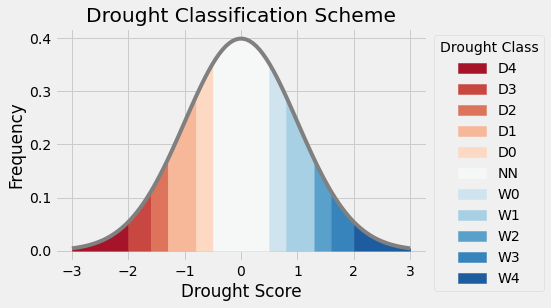

In [123]:
plt.figure(figsize=(8,4.5))
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = st.norm.pdf(x, mu, sigma)
plt.plot(x, y, color='gray')

plt.xlabel("Drought Score")
plt.ylabel("Frequency")
plt.title("Drought Classification Scheme");

# color drought 
interval = [-3, -2]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[1])), label="D4")

interval = [-2.0, -1.6]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[1])), label="D3")

interval = [-1.6, -1.3]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[1])), label="D2")

interval = [-1.3, -0.8]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[1])), label="D1")

interval = [-0.8, -0.5]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[1])), label="D0")

interval = [-0.5, 0.5]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(0)), label="NN")

interval = [0.5, 0.8]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[0])), label="W0")

interval = [0.8, 1.3]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[0])), label="W1")

interval = [1.3, 1.6]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[0])), label="W2")

interval = [1.6, 2]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[0])), label="W3")

interval = [2,3]
normal = np.linspace(interval[0], interval[1], 20)
plt.fill_between(normal, np.full(20, 0), st.norm.pdf(normal, mu, sigma), color=cm.RdBu(norm(interval[0])), label="W4")

plt.legend(bbox_to_anchor=(1, 1),title="Drought Class")
plt.tight_layout()
plt.savefig("/Users/julianschmitt/Documents/NOAA/plots/drought_classification_scheme.png", dpi=200)